In [1]:
# Import libraries and modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import tree
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read and display data shape
imdb = pd.read_csv('IMDB_dataset.csv', nrows=15000)
imdb.shape

(15000, 2)

In [3]:
# # Display last 5 rows of data
# imdb.tail()

In [4]:
# # Summarize data
# imdb.describe()

#### Check  distribution of data

In [5]:
# class_dist = imdb.groupby('sentiment').size()
# labels = 'positive','negative',
# fig, ax = plt.subplots()
# ax.set_title('Class Distribution', y=1.08)
# ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
#        shadow=False, startangle=90)
# ax.axis('equal')

In [6]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
imdb['sentiment']= label_encoder.fit_transform(imdb['sentiment']) 

imdb['sentiment'].unique() 


array([1, 0])

#### Movie reviews vary in length. For example one movie review may contain 20 words while a second one 500 words.Below is a visualization of review length

In [7]:
# lengths = [len(i) for i in imdb['review']]
# print(f'Max length of sentence: {max(lengths)}')
# print(f'Average length of sentence: {np.mean(lengths)}')

# sns.distplot(lengths)

#### Bag of Words
In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors. Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors

In [8]:
# cv = CountVectorizer(stop_words='english') 

# #`data` is an array of strings

# data_cv = cv.fit_transform(imdb['review']) 
 
# print(data_cv)

CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [9]:
# #create a dictionary with feature names as keys and row elements as values
# print(cv.vocabulary_)

#### TFIDF
Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [10]:
# tfidf_transformer = TfidfTransformer()
# data_tfidf = tfidf_transformer.fit_transform(data_cv)
# print(data_tfidf)

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data_tfidf, imdb['sentiment'], test_size=0.30)

### Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

####  Naive Bayes Classification

In [12]:
# bayes_clf = MultinomialNB().fit(X_train, y_train)
# bayes_clf_predicted = bayes_clf.predict(X_test)
# print('Test accuracy: %.2f%%' % (np.mean(bayes_clf_predicted == y_test)*100))

In [13]:
# #Classification report for bag of words for Naive Bayes classification
# bayes_clf_report=classification_report(y_test,bayes_clf_predicted,target_names=['Positive','Negative'])
# print(bayes_clf_report)

In [14]:
# bayes_clf_cm=confusion_matrix(y_test,bayes_clf_predicted,labels=[1,0])
# print(bayes_clf_cm)

# # Plot Confusion Matrix for Naive Bayes
# bayes_clf_dm = pd.DataFrame(bayes_clf_cm, index = [i for i in ['positive', 'negative']],
#               columns = [i for i in ['positive', 'negative']])
# plt.figure(figsize = (10,7))
# sns.heatmap(bayes_clf_dm, annot=True,cmap="OrRd")

####  Linear SVC Classification

In [15]:
# LinearSVC_clf = LinearSVC().fit(X_train, y_train)
# LinearSVC_clf_predicted = LinearSVC_clf.predict(X_test)
# print('Test accuracy: %.2f%%' % (np.mean(LinearSVC_clf_predicted == y_test)*100))

In [16]:
# #Classification report for bag of words 
# LinearSVC_clf_report=classification_report(y_test,LinearSVC_clf_predicted,target_names=['Positive','Negative'])
# print(LinearSVC_clf_report)

In [17]:
# LinearSVC_clf_cm=confusion_matrix(y_test,LinearSVC_clf_predicted,labels=[1,0])
# print(LinearSVC_clf_cm)

# # Plot Confusion Matrix
# LinearSVC_clf_df_cm = pd.DataFrame(LinearSVC_clf_cm, index = [i for i in ['positive', 'negative']],
#               columns = [i for i in ['positive', 'negative']])
# plt.figure(figsize = (10,7))
# sns.heatmap(LinearSVC_clf_df_cm, annot=True,cmap="OrRd")

####  Decision Tree Classification

In [18]:
# DecisionTree_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
# DecisionTree_clf_predicted = DecisionTree_clf.predict(X_test)
# print('Test accuracy: %.2f%%' % (np.mean(DecisionTree_clf_predicted == y_test)*100))

In [19]:
# #Classification report for bag of words 
# DecisionTree_clf_report=classification_report(y_test,DecisionTree_clf_predicted,target_names=['Positive','Negative'])
# print(DecisionTree_clf_report)

In [20]:
# DecisionTree_clf_cm=confusion_matrix(y_test,DecisionTree_clf_predicted,labels=[1,0])
# print(DecisionTree_clf_cm)

# # Plot Confusion Matrix
# DecisionTree_clf_df_cm = pd.DataFrame(DecisionTree_clf_cm, index = [i for i in ['positive', 'negative']],
#               columns = [i for i in ['positive', 'negative']])
# plt.figure(figsize = (10,7))
# sns.heatmap(DecisionTree_clf_df_cm, annot=True,cmap="OrRd")

#### Word Cloud

In [21]:
# from wordcloud import WordCloud,STOPWORDS

# #word cloud for positive review words
# plt.figure(figsize=(10,10))
# positive_text=imdb.review[1]
# WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
# positive_words=WC.generate(positive_text)
# plt.imshow(positive_words,interpolation='bilinear')

In [22]:
# #Word cloud for negative review words
# plt.figure(figsize=(10,10))
# negative_text=imdb.review[5052]
# WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
# negative_words=WC.generate(negative_text)
# plt.imshow(negative_words,interpolation='bilinear')
# plt.show

In [23]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

In [24]:
# #Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = simple_stemmer(text)
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(denoise_text)

In [25]:
from nltk.corpus import stopwords
#set stopwords to english
stop=set(stopwords.words('english'))
# print(stop)

#removing the stopword and tokenizing
imdb['review'] = imdb.apply(lambda row: nltk.word_tokenize(row['review']), axis=1)
imdb['review'] = imdb['review'].apply(lambda x: [item for item in x if item not in stop])

In [26]:
imdb.head()

,review,sentiment
0,"[one, review, ha, mention, watch, 1, Oz, episo...",1
1,"[A, wonder, littl, product, film, techniqu, ve...",1
2,"[I, thought, thi, wa, wonder, way, spend, time...",1
3,"[basic, famili, littl, boy, jake, think, zombi...",0
4,"[petter, mattei, love, time, money, visual, st...",1


In [ ]:
from gensim.models.fasttext import FastText
# Set values for various parameters
feature_size = 150    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-2   # Downsample setting for frequent words
fastxt = FastText(sentences=imdb.review[:], size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=4)
print(fastxt)

In [ ]:
# Get keyvectors  and dictionary of words of FastText model

word_keyvec = (fastxt.wv.vectors_vocab)

word2index = {} # Initialize empty dictionary for word to index
for index, word in enumerate(fastxt.wv.index2word): # Generae word index
    word2index[word] = index


In [ ]:
from keras.preprocessing.sequence import pad_sequences

new_imdb_review = [] 
for sent in imdb.review:
    temp_sent = []
    for word in sent[:feature_size]:
            try:
                temp_sent.append(word2index[word])
            except KeyError:
                      continue
    new_imdb_review.append(temp_sent)
    
padded_imdb_review = pad_sequences(new_imdb_review, maxlen=feature_size) # Use keras to pad leading 0s to reviews
padded_imdb_review = np.array(padded_imdb_review) # Convert the review list to a numpy array


In [ ]:
padded_imdb_review[1]

In [ ]:
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping


# set parameters:
max_features = len(word_keyvec)
maxlen = embedding_dims = feature_size
batch_size = 32
filters = 250
kernel_size = 3
hidden_dims = 200
epochs = 6

class TestCallback(Callback):
    
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(padded_imdb_review, imdb.sentiment, test_size=0.20, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1, shuffle=True)

print(len(x_train), 'train sequences')
print(len(x_val), 'val sequences')
print(len(x_test), 'test sequences')

In [ ]:
print('Build model...')
cnn_model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
cnn_model.add(Embedding(max_features,
                    embedding_dims,
                    weights = [np.array(word_keyvec)],
                    trainable=True,
                    input_length=maxlen))
cnn_model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
cnn_model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
cnn_model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
cnn_model.add(Dense(hidden_dims))
cnn_model.add(Dropout(0.5))
cnn_model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn_model.add(Dense(1))
cnn_model.add(Activation('sigmoid'))

cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
cnn_model.summary()

In [ ]:
# Fit cnn model
cnn_model_hist = cnn_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
            validation_data=(x_val, y_val),
                 callbacks=[TestCallback((x_test, y_test)), EarlyStopping(monitor='val_loss', patience=2)])

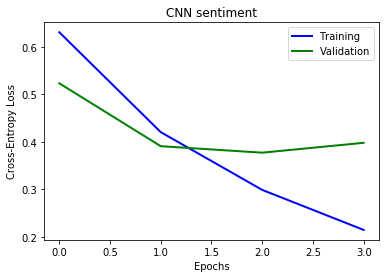

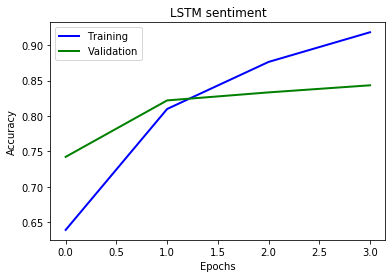

In [36]:
# summarize history for Loss
plt.figure()
plt.plot(cnn_model_hist.history['loss'], lw=2.0, color='b', label='Training')
plt.plot(cnn_model_hist.history['val_loss'], lw=2.0, color='g', label='Validation')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')

# summarize history for accuracy
plt.figure()
plt.plot(cnn_model_hist.history['accuracy'], lw=2.0, color='b', label='Training')
plt.plot(cnn_model_hist.history['val_accuracy'], lw=2.0, color='g', label='Validation')
plt.title('LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

In [42]:
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D

lstm_model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
lstm_model.add(Embedding(max_features,
                    embedding_dims,
                    weights = [np.array(word_keyvec)],
                    trainable=True,
                    input_length=maxlen))
lstm_model.add(Bidirectional(LSTM(30, return_sequences = True, recurrent_dropout=0.5)))
lstm_model.add(GlobalMaxPool1D())
lstm_model.add(Dense(20, activation="relu"))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          2345900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 60)           31440     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 2,378,581
Trainable params: 2,378,581
Non-trainable params: 0
____________________________________________

In [43]:
# fit lstm model
lstm_model_hist = lstm_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
            validation_data=(x_val, y_val),
                 callbacks=[TestCallback((x_test, y_test)), EarlyStopping(monitor='val_loss', patience=2)])

Train on 9000 samples, validate on 3000 samples
Epoch 1/4
9000/9000 [==============================] - 72s 8ms/step - loss: 0.5976 - accuracy: 0.6691 - val_loss: 0.4326 - val_accuracy: 0.8167

Testing loss: 0.4235051236152649, acc: 0.8176666498184204

Epoch 2/4
9000/9000 [==============================] - 64s 7ms/step - loss: 0.3978 - accuracy: 0.8384 - val_loss: 0.3807 - val_accuracy: 0.8287

Testing loss: 0.37489493989944456, acc: 0.8256666660308838

Epoch 3/4
9000/9000 [==============================] - 64s 7ms/step - loss: 0.2792 - accuracy: 0.8981 - val_loss: 0.3699 - val_accuracy: 0.8363

Testing loss: 0.3613954753081004, acc: 0.843666672706604

Epoch 4/4
9000/9000 [==============================] - 66s 7ms/step - loss: 0.2005 - accuracy: 0.9364 - val_loss: 0.3914 - val_accuracy: 0.8380

Testing loss: 0.3852478039264679, acc: 0.8413333296775818



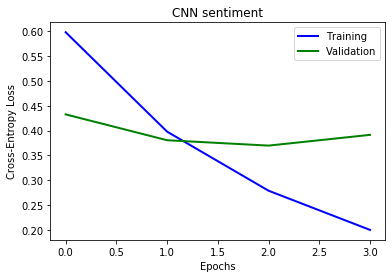

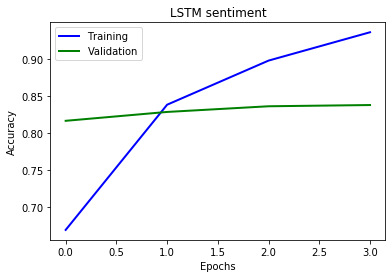

In [44]:
# summarize history for Loss
plt.figure()
plt.plot(lstm_model_hist.history['loss'], lw=2.0, color='b', label='Training')
plt.plot(lstm_model_hist.history['val_loss'], lw=2.0, color='g', label='Validation')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')

# summarize history for accuracy
plt.figure()
plt.plot(lstm_model_hist.history['accuracy'], lw=2.0, color='b', label='Training')
plt.plot(lstm_model_hist.history['val_accuracy'], lw=2.0, color='g', label='Validation')
plt.title('LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')